# Alpaca Stocks for Project 2 - Chip and Dip? The Chip Factor? Chip Gaines (pun)?

In [63]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import csv
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
# Load .env environment variables
project_folder = os.path.expanduser('~/Desktop/project2')  # adjust yours as appropriate
load_dotenv((os.path.join(project_folder, 'SAMPLE.env')))

True

In [65]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

In [66]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [67]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [68]:
# Format the current date as ISO format
today = pd.Timestamp("2021-09-28", tz="America/New_York").isoformat()

In [69]:
# Set the tickers for the stocks you have chosen
# We are selecting the following 15 (note to group that 14 currently work, but added in VOO)
tickers = ["TSM", "QCOM", "VALE", "AMD", "BHP", "RIO", "FCX", "INTC", "MSFT", "DDD", "NVDA", "TSLA", "AMAT", "F", "VOO"]

In [70]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [71]:
# Get current closing prices for above stocks
df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit = 500
).df

# Display sample data
# Auto formats in alphabetical order
df_portfolio

AMAT                                         AMD  \
                             open    high       low   close    volume    open   
time                                                                            
2021-09-28 00:00:00-04:00  137.62  139.58  132.5339  132.91  10774137  106.79   

                                                             ...   VALE  \
                             high     low   close    volume  ...   open   
time                                                         ...          
2021-09-28 00:00:00-04:00  107.65  101.42  101.52  71109820  ...  14.35   

                                                            VOO          \
                            high    low close    volume    open    high   
time                                                                      
2021-09-28 00:00:00-04:00  14.41  13.76  13.8  39804576  405.53  405.87   

                                                    
                              low   close   volume  
time                                                
2021-09-28 00:00:00-04:00  399.33  400.09  7903801  

[1 rows x 75 columns]

In [72]:
# The farthest Alpaca will go back is 4 months for one pull
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2021-05-28", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-09-28", tz="America/New_York").isoformat()

In [73]:
# Get closing prices for chosen stocks from start to end date of choice and set limit to 1000
df_portfolio_months = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Display sample data
df_portfolio_months.head(5)

AMAT                                     AMD  \
                             open    high     low   close   volume   open   
time                                                                        
2021-05-28 00:00:00-04:00  139.10  139.46  137.82  138.13  5352486  78.69   
2021-06-01 00:00:00-04:00  138.98  142.12  137.26  138.20  8172772  81.01   
2021-06-02 00:00:00-04:00  138.10  140.36  136.92  139.01  5701164  81.00   
2021-06-03 00:00:00-04:00  137.13  138.03  135.09  136.38  7450791  81.15   
2021-06-04 00:00:00-04:00  137.80  140.85  137.62  139.86  5760286  80.92   

                                                          ...   VALE          \
                            high    low  close    volume  ...   open    high   
time                                                      ...                  
2021-05-28 00:00:00-04:00  81.09  78.66  80.10  38926159  ...  21.08  21.670   
2021-06-01 00:00:00-04:00  82.91  80.66  80.80  41575624  ...  22.69  22.800   
2021-06-02 00:00:00-04:00  82.60  80.66  81.99  33784147  ...  22.05  22.830   
2021-06-03 00:00:00-04:00  81.89  80.26  80.27  27741701  ...  22.39  22.490   
2021-06-04 00:00:00-04:00  82.19  80.81  81.57  24661996  ...  22.68  22.685   

                                                        VOO                  \
                              low   close    volume    open    high     low   
time                                                                          
2021-05-28 00:00:00-04:00  20.950  21.520  37971342  387.03  387.27  385.94   
2021-06-01 00:00:00-04:00  22.060  22.195  39826043  388.50  388.62  385.38   
2021-06-02 00:00:00-04:00  21.975  22.690  42481594  386.43  387.24  385.47   
2021-06-03 00:00:00-04:00  22.010  22.405  25519244  384.17  386.11  382.70   
2021-06-04 00:00:00-04:00  22.255  22.460  18947927  386.81  388.80  386.76   

                                            
                            close   volume  
time                                        
2021-05-28 00:00:00-04:00  386.14  2989968  
2021-06-01 00:00:00-04:00  385.79  3450288  
2021-06-02 00:00:00-04:00  386.49  3091198  
2021-06-03 00:00:00-04:00  385.09  3161557  
2021-06-04 00:00:00-04:00  388.53  2054784  

[5 rows x 75 columns]

In [74]:
# Clean the data and drop all columns except for closing
df_portfolio_months_clean = df_portfolio_months.drop(['open', 'low', 'high'], axis=1, level=1)

# Display sample data
df_portfolio_months_clean.head(5)


AMAT             AMD               BHP           \
                            close   volume  close    volume   close   volume   
time                                                                           
2021-05-28 00:00:00-04:00  138.13  5352486  80.10  38926159  74.110   987471   
2021-06-01 00:00:00-04:00  138.20  8172772  80.80  41575624  76.300  1820431   
2021-06-02 00:00:00-04:00  139.01  5701164  81.99  33784147  76.255  1262039   
2021-06-03 00:00:00-04:00  136.38  7450791  80.27  27741701  74.960  1081251   
2021-06-04 00:00:00-04:00  139.86  5760286  81.57  24661996  76.110   934508   

                             DDD                 F             ...    RIO  \
                           close   volume    close     volume  ...  close   
time                                                           ...          
2021-05-28 00:00:00-04:00  29.44  6490662  14.5300  141622031  ...  87.43   
2021-06-01 00:00:00-04:00  28.99  3609828  14.8100   83200280  ...  90.77   
2021-06-02 00:00:00-04:00  32.33  6547593  14.9000   72766581  ...  90.24   
2021-06-03 00:00:00-04:00  30.20  4739859  16.0001  168681043  ...  88.49   
2021-06-04 00:00:00-04:00  30.00  3231828  15.9601  140827381  ...  89.76   

                                        TSLA                TSM           \
                            volume     close    volume    close   volume   
time                                                                       
2021-05-28 00:00:00-04:00  1652945  625.7100  21525163  117.360  4767144   
2021-06-01 00:00:00-04:00  3921661  624.0300  17155669  118.510  6880051   
2021-06-02 00:00:00-04:00  2278392  605.0001  22315710  118.930  4634811   
2021-06-03 00:00:00-04:00  2524998  572.8250  28308048  116.826  4321505   
2021-06-04 00:00:00-04:00  2344842  599.3500  22616463  119.620  4946838   

                             VALE               VOO           
                            close    volume   close   volume  
time                                                          
2021-05-28 00:00:00-04:00  21.520  37971342  386.14  2989968  
2021-06-01 00:00:00-04:00  22.195  39826043  385.79  3450288  
2021-06-02 00:00:00-04:00  22.690  42481594  386.49  3091198  
2021-06-03 00:00:00-04:00  22.405  25519244  385.09  3161557  
2021-06-04 00:00:00-04:00  22.460  18947927  388.53  2054784  

[5 rows x 30 columns]

In [75]:
# The farthest Alpaca will go back is 4 months for one pull, so we repeat process below
# Format start and end dates as ISO format for four month period
# Use the start date above as the end date below

start_2 = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()
end_2 = pd.Timestamp("2021-05-27", tz="America/New_York").isoformat()

df_portfolio_months_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_2,
    end = end_2,
    limit = 1000
).df

# Clean the data and drop all columns except for closing
df_portfolio_months_2_clean = df_portfolio_months_2.drop(['open', 'low', 'high'], axis=1, level=1)

# Display sample data
df_portfolio_months_2_clean.head(5)

AMAT             AMD              BHP           \
                           close   volume  close    volume  close   volume   
time                                                                         
2021-01-04 00:00:00-05:00  86.87  6569399  92.30  50507796  67.34  2548575   
2021-01-05 00:00:00-05:00  89.61  5917088  92.77  32831671  69.50  3115275   
2021-01-06 00:00:00-05:00  90.83  8178419  90.32  49271453  71.71  4438674   
2021-01-07 00:00:00-05:00  94.57  7545334  95.10  40915929  73.18  2122419   
2021-01-08 00:00:00-05:00  95.57  7955703  94.58  38955375  73.45  2360227   

                             DDD                  F            ...    RIO  \
                           close     volume   close    volume  ...  close   
time                                                           ...          
2021-01-04 00:00:00-05:00  10.47    2172873  8.5200  80476198  ...  77.42   
2021-01-05 00:00:00-05:00  10.88    1973790  8.6450  67535397  ...  79.26   
2021-01-06 00:00:00-05:00  11.24    2736705  8.8422  68520361  ...  82.82   
2021-01-07 00:00:00-05:00  22.96  191024411  9.0500  70837077  ...  85.98   
2021-01-08 00:00:00-05:00  23.52  132865958  9.0000  57267427  ...  86.68   

                                       TSLA               TSM            \
                            volume    close    volume   close    volume   
time                                                                      
2021-01-04 00:00:00-05:00  2421955  729.750  45293360  111.71   9813019   
2021-01-05 00:00:00-05:00  2207083  735.055  28402584  112.74  10259226   
2021-01-06 00:00:00-05:00  2628211  756.460  41989335  115.60  10237526   
2021-01-07 00:00:00-05:00  2821171  816.240  48080256  121.43  12843142   
2021-01-08 00:00:00-05:00  2325546  880.030  71814487  118.64  18508139   

                             VALE               VOO           
                            close    volume   close   volume  
time                                                          
2021-01-04 00:00:00-05:00  17.400  43157459  339.03  5014185  
2021-01-05 00:00:00-05:00  17.695  37353783  341.28  3144296  
2021-01-06 00:00:00-05:00  18.150  37410433  343.43  4701118  
2021-01-07 00:00:00-05:00  18.930  70417214  348.44  3501103  
2021-01-08 00:00:00-05:00  18.920  41204672  350.42  3705025  

[5 rows x 30 columns]

In [76]:
# The farthest Alpaca will go back is 4 months for one pull, so we repeat process below
# Format start and end dates as ISO format for four month period
# Use the start date above as the end date below

start_3 = pd.Timestamp("2020-09-28", tz="America/New_York").isoformat()
end_3 = pd.Timestamp("2021-01-01", tz="America/New_York").isoformat()

df_portfolio_months_3 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_3,
    end = end_3,
    limit = 1000
).df

# Clean the data and drop all columns except for closing
df_portfolio_months_3_clean = df_portfolio_months_3.drop(['open', 'low', 'high'], axis=1, level=1)

# Display sample data
df_portfolio_months_3_clean.head(5)

AMAT               AMD              BHP           \
                           close   volume    close    volume  close   volume   
time                                                                           
2020-09-28 00:00:00-04:00  59.31  6260486  79.5200  43111531  52.74  1874323   
2020-09-29 00:00:00-04:00  59.67  4501381  81.7500  59458078  51.60  4594819   
2020-09-30 00:00:00-04:00  59.44  5961801  81.9301  46458134  51.70  3566851   
2020-10-01 00:00:00-04:00  60.64  6330692  84.8900  49642884  51.33  3357198   
2020-10-02 00:00:00-04:00  58.21  5672323  81.8400  48631616  51.44  3793716   

                            DDD               F             ...     RIO  \
                          close   volume  close     volume  ...   close   
time                                                        ...           
2020-09-28 00:00:00-04:00  4.79  1710523  6.695   43985784  ...  60.500   
2020-09-29 00:00:00-04:00  4.92  4524660  6.590   72171314  ...  60.215   
2020-09-30 00:00:00-04:00  4.90  3508832  6.650   92055328  ...  60.410   
2020-10-01 00:00:00-04:00  4.87  2757108  6.745   98263431  ...  59.840   
2020-10-02 00:00:00-04:00  4.87  3008264  6.890  101610232  ...  60.490   

                                        TSLA              TSM            \
                            volume     close    volume  close    volume   
time                                                                      
2020-09-28 00:00:00-04:00  3067588  421.0602  46468845  79.77   5615288   
2020-09-29 00:00:00-04:00  4924997  418.9900  47939292  80.52  11476689   
2020-09-30 00:00:00-04:00  3850541  428.9700  45355318  81.07  11016860   
2020-10-01 00:00:00-04:00  3094476  447.8100  46917693  82.62  11386804   
2020-10-02 00:00:00-04:00  4739088  415.2699  64001779  80.81  10972596   

                             VALE               VOO           
                            close    volume   close   volume  
time                                                          
2020-09-28 00:00:00-04:00  10.480  37147138  308.32  2376657  
2020-09-29 00:00:00-04:00  10.410  53507461  305.31  2197225  
2020-09-30 00:00:00-04:00  10.580  51168819  307.61  4091286  
2020-10-01 00:00:00-04:00  10.415  41588198  309.58  2823625  
2020-10-02 00:00:00-04:00  10.390  46358919  306.69  3051150  

[5 rows x 30 columns]

In [77]:
#Combine all the cleaned data into one table by using concat
merged_portfolio = pd.concat([df_portfolio_months_3_clean, df_portfolio_months_2_clean, df_portfolio_months_clean])

# Display the head and tail of the newly merged portfolio
merged_portfolio.head()

AMAT               AMD              BHP           \
                           close   volume    close    volume  close   volume   
time                                                                           
2020-09-28 00:00:00-04:00  59.31  6260486  79.5200  43111531  52.74  1874323   
2020-09-29 00:00:00-04:00  59.67  4501381  81.7500  59458078  51.60  4594819   
2020-09-30 00:00:00-04:00  59.44  5961801  81.9301  46458134  51.70  3566851   
2020-10-01 00:00:00-04:00  60.64  6330692  84.8900  49642884  51.33  3357198   
2020-10-02 00:00:00-04:00  58.21  5672323  81.8400  48631616  51.44  3793716   

                            DDD               F             ...     RIO  \
                          close   volume  close     volume  ...   close   
time                                                        ...           
2020-09-28 00:00:00-04:00  4.79  1710523  6.695   43985784  ...  60.500   
2020-09-29 00:00:00-04:00  4.92  4524660  6.590   72171314  ...  60.215   
2020-09-30 00:00:00-04:00  4.90  3508832  6.650   92055328  ...  60.410   
2020-10-01 00:00:00-04:00  4.87  2757108  6.745   98263431  ...  59.840   
2020-10-02 00:00:00-04:00  4.87  3008264  6.890  101610232  ...  60.490   

                                        TSLA              TSM            \
                            volume     close    volume  close    volume   
time                                                                      
2020-09-28 00:00:00-04:00  3067588  421.0602  46468845  79.77   5615288   
2020-09-29 00:00:00-04:00  4924997  418.9900  47939292  80.52  11476689   
2020-09-30 00:00:00-04:00  3850541  428.9700  45355318  81.07  11016860   
2020-10-01 00:00:00-04:00  3094476  447.8100  46917693  82.62  11386804   
2020-10-02 00:00:00-04:00  4739088  415.2699  64001779  80.81  10972596   

                             VALE               VOO           
                            close    volume   close   volume  
time                                                          
2020-09-28 00:00:00-04:00  10.480  37147138  308.32  2376657  
2020-09-29 00:00:00-04:00  10.410  53507461  305.31  2197225  
2020-09-30 00:00:00-04:00  10.580  51168819  307.61  4091286  
2020-10-01 00:00:00-04:00  10.415  41588198  309.58  2823625  
2020-10-02 00:00:00-04:00  10.390  46358919  306.69  3051150  

[5 rows x 30 columns]

In [78]:
# For some reason I am only ever able to show head and tails of a table in two separate code blocks
# So here is the display of the tail of the newly merged portfolio
merged_portfolio.tail()

AMAT                 AMD              BHP  \
                            close    volume     close    volume  close   
time                                                                     
2021-09-22 00:00:00-04:00  138.10   5499382  104.3874  32420839  55.01   
2021-09-23 00:00:00-04:00  141.11   5022612  106.1500  31320213  55.06   
2021-09-24 00:00:00-04:00  141.94   3235463  105.8000  25412547  54.53   
2021-09-27 00:00:00-04:00  142.74   4500169  108.1400  50368251  55.07   
2021-09-28 00:00:00-04:00  132.91  10774137  101.5200  71109820  52.55   

                                      DDD                F            ...  \
                            volume  close   volume   close    volume  ...   
time                                                                  ...   
2021-09-22 00:00:00-04:00  5170304  29.00  1343670  13.240  68361903  ...   
2021-09-23 00:00:00-04:00  8138224  29.49  1307111  13.700  65450567  ...   
2021-09-24 00:00:00-04:00  3004601  29.15  1488537  13.780  52066001  ...   
2021-09-27 00:00:00-04:00  3129419  29.80  1323481  14.169  63099249  ...   
2021-09-28 00:00:00-04:00  6039317  28.55  1220898  14.315  96226953  ...   

                               RIO             TSLA               TSM  \
                             close   volume   close    volume   close   
time                                                                    
2021-09-22 00:00:00-04:00  66.6100  5814441  751.75  13586028  115.93   
2021-09-23 00:00:00-04:00  67.0500  3561548  753.68  11244060  116.18   
2021-09-24 00:00:00-04:00  66.7695  3280825  774.54  20458573  115.62   
2021-09-27 00:00:00-04:00  67.5400  3328176  791.40  26193857  116.16   
2021-09-28 00:00:00-04:00  65.8500  4954738  777.56  23562104  111.86   

                                     VALE               VOO           
                            volume  close    volume   close   volume  
time                                                                  
2021-09-22 00:00:00-04:00  4865158  16.42  50059762  403.86  5462282  
2021-09-23 00:00:00-04:00  4942588  14.82  48252357  408.73  3747855  
2021-09-24 00:00:00-04:00  4194719  14.49  33550901  409.46  3204191  
2021-09-27 00:00:00-04:00  4333765  14.55  44261902  408.31  3370305  
2021-09-28 00:00:00-04:00  9085028  13.80  39804576  400.09  7903801  

[5 rows x 30 columns]

In [79]:
# Send to CSV file

merged_portfolio.to_csv('cleaned_stock_data.csv')

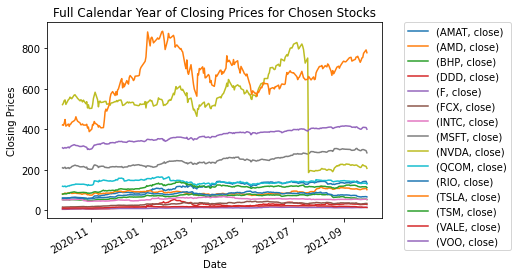

In [80]:
# Graph your stocks closing prices over the course of the last year by using the data you just merged into one portfolio
# We are graphing the data to get a visualization over the stock closing price performance over the last year

# First remove the volume column from the portfolio to just plot the closing prices
merged_portfolio_close_dates = merged_portfolio.drop(['volume'], axis=1, level=1)

merged_portfolio_close_dates.plot()
plt.title('Full Calendar Year of Closing Prices for Chosen Stocks')
plt.ylabel('Closing Prices')
plt.xlabel('Date')
plt.legend(loc="lower right", bbox_to_anchor=(1.4, -0.19), ncol=1)

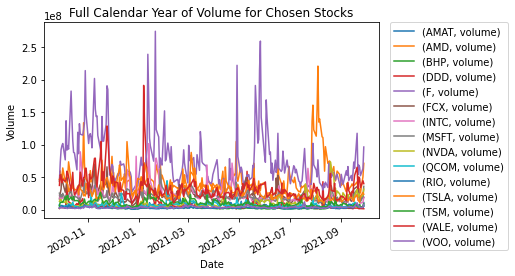

In [81]:
# Graph your stocks daily volume over the course of the last year by using the data you just merged into one portfolio
# We are graphing the data to get a visualization over the changes in volume over the last year

# First remove the close column from the portfolio to just plot the volume
merged_portfolio_volumes = merged_portfolio.drop(['close'], axis=1, level=1)

merged_portfolio_volumes.plot()
plt.title('Full Calendar Year of Volume for Chosen Stocks')
plt.ylabel('Volume')
plt.xlabel('Date')
plt.legend(loc="lower right", bbox_to_anchor=(1.4, -0.19), ncol=1)

In [82]:
# Create a Lagged Volume column that shifts the volume of each stock back by one day

# Since there are multiple columns with the name volume, we must create a loop 
for widget in merged_portfolio.columns.levels[0]:
    merged_portfolio.loc[:,(widget, 'lagged volume')] = merged_portfolio[(widget, 'volume')].shift(1)

# Then we sort the columns to show within each stock
merged_portfolio = merged_portfolio.sort_index(axis=1, level=0)

#Display portfolio 
merged_portfolio.head(3)

AMAT                             AMD  \
                           close lagged volume   volume    close   
time                                                               
2020-09-28 00:00:00-04:00  59.31           NaN  6260486  79.5200   
2020-09-29 00:00:00-04:00  59.67     6260486.0  4501381  81.7500   
2020-09-30 00:00:00-04:00  59.44     4501381.0  5961801  81.9301   

                                                     BHP                \
                          lagged volume    volume  close lagged volume   
time                                                                     
2020-09-28 00:00:00-04:00           NaN  43111531  52.74           NaN   
2020-09-29 00:00:00-04:00    43111531.0  59458078  51.60     1874323.0   
2020-09-30 00:00:00-04:00    59458078.0  46458134  51.70     4594819.0   

                                     DDD  ...      TSLA    TSM                \
                            volume close  ...    volume  close lagged volume   
time                                      ...                                  
2020-09-28 00:00:00-04:00  1874323  4.79  ...  46468845  79.77           NaN   
2020-09-29 00:00:00-04:00  4594819  4.92  ...  47939292  80.52     5615288.0   
2020-09-30 00:00:00-04:00  3566851  4.90  ...  45355318  81.07    11476689.0   

                                      VALE                             VOO  \
                             volume  close lagged volume    volume   close   
time                                                                         
2020-09-28 00:00:00-04:00   5615288  10.48           NaN  37147138  308.32   
2020-09-29 00:00:00-04:00  11476689  10.41    37147138.0  53507461  305.31   
2020-09-30 00:00:00-04:00  11016860  10.58    53507461.0  51168819  307.61   

                                                  
                          lagged volume   volume  
time                                              
2020-09-28 00:00:00-04:00           NaN  2376657  
2020-09-29 00:00:00-04:00     2376657.0  2197225  
2020-09-30 00:00:00-04:00     2197225.0  4091286  

[3 rows x 45 columns]

In [83]:
# Create a Daily Stock Return column that will calculate the daily percent change of the closing stock prices

# Since there are multiple columns with the name close, we must create a loop 

for stock in merged_portfolio.columns.levels[0]:
    merged_portfolio.loc[:,(stock, 'daily return')] = merged_portfolio[(stock, 'close')].pct_change()

# Then we sort the columns to show within each stock
merged_portfolio = merged_portfolio.sort_index(axis=1, level=0)

#Display portfolio 
merged_portfolio.tail(3)

AMAT                                       \
                            close daily return lagged volume    volume   
time                                                                     
2021-09-24 00:00:00-04:00  141.94     0.005882     5022612.0   3235463   
2021-09-27 00:00:00-04:00  142.74     0.005636     3235463.0   4500169   
2021-09-28 00:00:00-04:00  132.91    -0.068866     4500169.0  10774137   

                              AMD                                         BHP  \
                            close daily return lagged volume    volume  close   
time                                                                            
2021-09-24 00:00:00-04:00  105.80    -0.003297    31320213.0  25412547  54.53   
2021-09-27 00:00:00-04:00  108.14     0.022117    25412547.0  50368251  55.07   
2021-09-28 00:00:00-04:00  101.52    -0.061217    50368251.0  71109820  52.55   

                                        ...           TSM            VALE  \
                          daily return  ... lagged volume   volume  close   
time                                    ...                                 
2021-09-24 00:00:00-04:00    -0.009626  ...     4942588.0  4194719  14.49   
2021-09-27 00:00:00-04:00     0.009903  ...     4194719.0  4333765  14.55   
2021-09-28 00:00:00-04:00    -0.045760  ...     4333765.0  9085028  13.80   

                                                                   VOO  \
                          daily return lagged volume    volume   close   
time                                                                     
2021-09-24 00:00:00-04:00    -0.022267    48252357.0  33550901  409.46   
2021-09-27 00:00:00-04:00     0.004141    33550901.0  44261902  408.31   
2021-09-28 00:00:00-04:00    -0.051546    44261902.0  39804576  400.09   

                                                               
                          daily return lagged volume   volume  
time                                                           
2021-09-24 00:00:00-04:00     0.001786     3747855.0  3204191  
2021-09-27 00:00:00-04:00    -0.002809     3204191.0  3370305  
2021-09-28 00:00:00-04:00    -0.020132     3370305.0  7903801  

[3 rows x 60 columns]

In [84]:
# Create a Stock Volatility column that will calculate the standard deviation of the closing stock prices

# Since there are multiple columns with the name close, we must create a loop 

for volatility in merged_portfolio.columns.levels[0]:
    merged_portfolio.loc[:,(volatility, 'stock volatility')] = merged_portfolio[(volatility, 'close')].pct_change().rolling(window=200).std()

# Then we sort the columns to show within each stock
merged_portfolio = merged_portfolio.sort_index(axis=1, level=0)

#Display portfolio 
merged_portfolio.tail(3)

AMAT                                              \
                            close daily return lagged volume stock volatility   
time                                                                            
2021-09-24 00:00:00-04:00  141.94     0.005882     5022612.0         0.027572   
2021-09-27 00:00:00-04:00  142.74     0.005636     3235463.0         0.027519   
2021-09-28 00:00:00-04:00  132.91    -0.068866     4500169.0         0.027982   

                                        AMD                             \
                             volume   close daily return lagged volume   
time                                                                     
2021-09-24 00:00:00-04:00   3235463  105.80    -0.003297    31320213.0   
2021-09-27 00:00:00-04:00   4500169  108.14     0.022117    25412547.0   
2021-09-28 00:00:00-04:00  10774137  101.52    -0.061217    50368251.0   

                                                      ...   VALE               \
                          stock volatility    volume  ...  close daily return   
time                                                  ...                       
2021-09-24 00:00:00-04:00         0.023840  25412547  ...  14.49    -0.022267   
2021-09-27 00:00:00-04:00         0.023763  50368251  ...  14.55     0.004141   
2021-09-28 00:00:00-04:00         0.024130  71109820  ...  13.80    -0.051546   

                                                                       VOO  \
                          lagged volume stock volatility    volume   close   
time                                                                         
2021-09-24 00:00:00-04:00    48252357.0         0.024603  33550901  409.46   
2021-09-27 00:00:00-04:00    33550901.0         0.024603  44261902  408.31   
2021-09-28 00:00:00-04:00    44261902.0         0.024544  39804576  400.09   

                                                                                
                          daily return lagged volume stock volatility   volume  
time                                                                            
2021-09-24 00:00:00-04:00     0.001786     3747855.0         0.007619  3204191  
2021-09-27 00:00:00-04:00    -0.002809     3204191.0         0.007591  3370305  
2021-09-28 00:00:00-04:00    -0.020132     3370305.0         0.007736  7903801  

[3 rows x 75 columns]

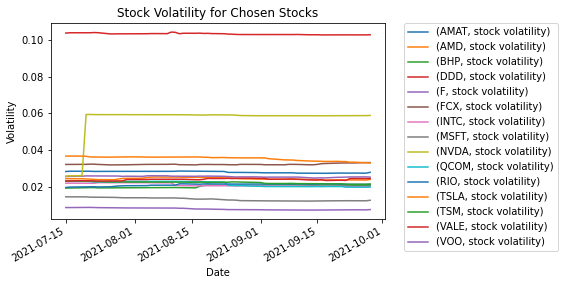

In [94]:
# Graph your stock volatility over the course of the last year by using the data you calculated above
# We are graphing the data to get a visualization over the stock volatility over the last year

# First remove the close, volume, lagged volume, and daily return columns from the portfolio to just plot the volume

merged_portfolio_stock_volatility = merged_portfolio.drop(['close', 'volume', 'lagged volume', 'daily return'], axis=1, level=1)

merged_portfolio_stock_volatility.plot()
plt.title('Stock Volatility for Chosen Stocks')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend(loc="lower right", bbox_to_anchor=(1.53, -0.19), ncol=1)

In [104]:
merged_portfolio_TSM_corr = merged_portfolio.drop(["QCOM", "VALE", "AMD", "BHP", "RIO", "FCX", "INTC", "MSFT", "DDD", "NVDA", "TSLA", "AMAT", "F", "VOO"], axis=1, level=0)

merged_portfolio_TSM_corr.corr()

TSM                                              \
                         close daily return lagged volume stock volatility   
TSM close             1.000000     0.009995     -0.134800        -0.308619   
    daily return      0.009995     1.000000      0.089766         0.039961   
    lagged volume    -0.134800     0.089766      1.000000         0.275038   
    stock volatility -0.308619     0.039961      0.275038         1.000000   
    volume           -0.149396     0.003838      0.692264         0.233813   

                                
                        volume  
TSM close            -0.149396  
    daily return      0.003838  
    lagged volume     0.692264  
    stock volatility  0.233813  
    volume            1.000000